Meine Idee: Ich möchte wissen, wie viel Geld ich ausgeben muss, damit ich im Schnitt alle Karten einer
Pokemon Edition haben werde

In [4]:
import pandas as pd
from random import randint, sample, choices

Wir verwenden die Information aus dem Internet (einfachen)

- https://www.pokemon.com/de/pokemon-sammelkartenspiel/karmesin-purpur-ewige-rivalen
- https://support.pokemon.com/hc/de/articles/360001024394-Was-f%C3%BCr-Pok%C3%A9mon-Sammelkartenspiel-Produkte-sind-verf%C3%BCgbar#:~:text=Jedes%20Boosterpack%20enth%C3%A4lt%2010%20Spielkarten,Sammelkartenspiel%2DLive%20eingel%C3%B6st%20werden%20kann

In [5]:
karten_in_erweiterung = 240
karten_in_booster = 10

In [8]:
randint(1, karten_in_erweiterung)

84

In [9]:
sample(range(karten_in_erweiterung), karten_in_booster)

[218, 37, 50, 201, 32, 7, 198, 222, 157, 217]

In [10]:
def oeffne_booster(karten_in_booster, karten_in_erweiterung):
    return sample(range(karten_in_erweiterung), karten_in_booster)

In [11]:
oeffne_booster(karten_in_booster, karten_in_erweiterung)

[144, 120, 124, 168, 229, 158, 70, 231, 67, 35]

In [12]:
max_wiederholung = 500

öffne max_wiederholung viele booster

In [19]:
karten_box_liste = []

In [20]:
for _ in range(max_wiederholung):
    erhaltenen_karte = oeffne_booster(karten_in_booster, karten_in_erweiterung)
    karten_box_liste.append(erhaltenen_karte)

In [21]:
karten_box_df = pd.DataFrame(karten_box_liste)
karten_box_df

,0,1,2,3,4,5,6,7,8,9
0,74,84,66,18,235,219,51,98,101,168
1,180,107,161,158,128,122,146,209,108,42
2,26,63,82,73,220,121,223,9,158,71
3,192,84,102,26,200,128,65,51,158,31
4,230,91,195,176,126,22,119,54,35,161
...,...,...,...,...,...,...,...,...,...,...
495,107,45,86,60,145,238,7,106,139,221
496,49,79,85,62,168,118,175,86,153,199
497,149,197,143,185,105,93,223,131,34,183
498,72,188,69,108,75,207,60,170,58,154


Wie oft habe ich jede Karte bekommen?*

In [22]:
karten_box_df.unstack().value_counts()

167    33
210    32
108    31
100    30
223    30
       ..
171    12
155    11
86     11
132    10
17     10
Name: count, Length: 240, dtype: int64

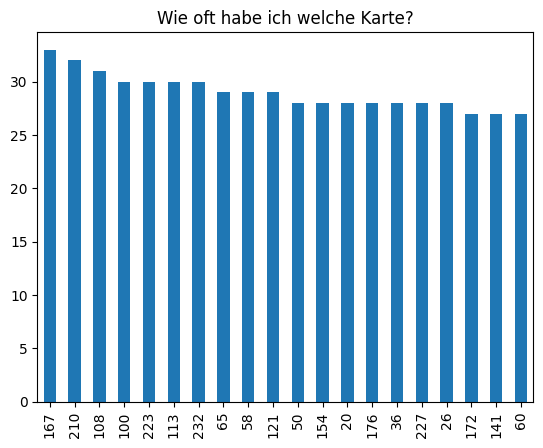

In [26]:
karten_box_df.unstack().value_counts().head(20).plot(kind="bar", title="Wie oft habe ich welche Karte?");

In [28]:
sammelalbum = set()
anzahl_gesammelter_karten = []

In [32]:
for (_, booster) in karten_box_df.iterrows():
    # füge aktuellen booster ins album hinzu
    sammelalbum.update(booster)
    anzahl_gesammelter_karten.append(len(sammelalbum))

In [34]:
karten_box_df["anzahl_gesammelter_karten"] = anzahl_gesammelter_karten

In [35]:
karten_box_df

,0,1,2,3,4,5,6,7,8,9,anzahl_gesammelter_karten
0,74,84,66,18,235,219,51,98,101,168,10
1,180,107,161,158,128,122,146,209,108,42,20
2,26,63,82,73,220,121,223,9,158,71,29
3,192,84,102,26,200,128,65,51,158,31,34
4,230,91,195,176,126,22,119,54,35,161,43
...,...,...,...,...,...,...,...,...,...,...,...
495,107,45,86,60,145,238,7,106,139,221,240
496,49,79,85,62,168,118,175,86,153,199,240
497,149,197,143,185,105,93,223,131,34,183,240
498,72,188,69,108,75,207,60,170,58,154,240


<Axes: title={'center': 'Wachstum der Kartensammlung'}>

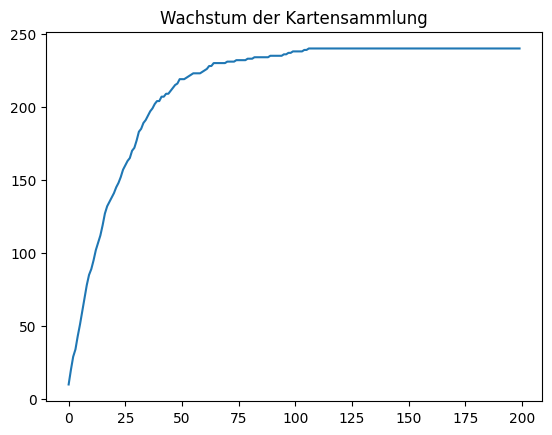

In [37]:
karten_box_df["anzahl_gesammelter_karten"].head(200).plot(title="Wachstum der Kartensammlung")

In [43]:
benoetigte_booster= karten_box_df.query("anzahl_gesammelter_karten  == @karten_in_erweiterung").head(1).index[0]+1
benoetigte_booster

np.int64(107)

In [44]:
preis_pro_booster = 4.5

In [45]:
gesamtpreis = benoetigte_booster * preis_pro_booster
gesamtpreis

np.float64(481.5)

Fasse die bisherigen Schritte in einer Funktion zusammen

In [81]:
def wie_viel_geld_bis_zur_vollstaendigen_erweiterung(karten_in_booster, karten_in_erweiterung,
                                                    max_wiederholung, preis_pro_booster):
    karten_box_liste = []
    for _ in range(max_wiederholung):
        erhaltenen_karte = oeffne_booster(karten_in_booster, karten_in_erweiterung)
        karten_box_liste.append(erhaltenen_karte)

    karten_box_df = pd.DataFrame(karten_box_liste)
    anzahl_gesammelter_karten = []
    sammelalbum = set()
    for (_, booster) in karten_box_df.iterrows():
        # füge aktuellen booster ins album hinzu
        sammelalbum.update(booster)
        anzahl_gesammelter_karten.append(len(sammelalbum))
    
    karten_box_df["anzahl_gesammelter_karten"] = anzahl_gesammelter_karten
    benoetigte_booster = karten_box_df.query("anzahl_gesammelter_karten  == @karten_in_erweiterung").head(1).index[0]+1
    gesamtpreis = benoetigte_booster * preis_pro_booster
    return gesamtpreis

In [82]:
wie_viel_geld_bis_zur_vollstaendigen_erweiterung(karten_in_booster, karten_in_erweiterung,
                                                    max_wiederholung, preis_pro_booster)

np.float64(504.0)

In [83]:
anzahl_durchgaenge = 1000

In [84]:
benoetigtes_geld = []
for _ in range(anzahl_durchgaenge):
    benoetigtes_geld.append(
        wie_viel_geld_bis_zur_vollstaendigen_erweiterung(karten_in_booster, karten_in_erweiterung,
                                                    max_wiederholung, preis_pro_booster)
    )

<Axes: >

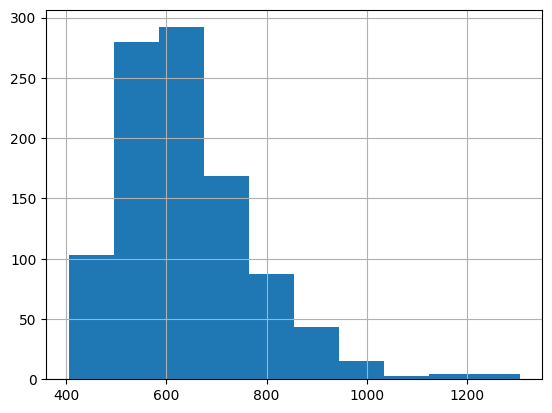

In [85]:
pd.Series(benoetigtes_geld).hist()

In [86]:
pd.Series(benoetigtes_geld).describe()

count    1000.000000
mean      639.265500
std       132.434751
min       405.000000
25%       544.500000
50%       616.500000
75%       707.625000
max      1305.000000
dtype: float64

benedikt.mangold@th-nuernberg.de